In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git-repos/floto-tavi-outcome-prediction


In [3]:
from pathlib import Path
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
read_img = lambda p: cv2.cvtColor(cv2.imread(str(p)), cv2.COLOR_BGR2RGB)
src = Path('./notebooks/images/nature')
heart = read_img(src / 'heart.png')
hps = read_img(src / 'hps.png')
ms = read_img(src / 'ms.png')
calc = read_img(src / 'calc.png')
all = read_img(src / 'all2.png')

In [92]:
all = all[40:820,500:1050]
heart = heart[40:820,500:1050]
hps = hps[170:520,510:785]
ms = ms[170:520,510:785]
calc = calc[170:520,510:785]

In [93]:
save_img = lambda x, p: cv2.imwrite(p, cv2.cvtColor(x, cv2.COLOR_RGB2BGR))
save_img(all, str(src / 'all2.png'))
save_img(heart, str(src / 'heart2.png'))
save_img(hps, str(src / 'hps2.png'))
save_img(ms, str(src / 'ms2.png'))
save_img(calc, str(src / 'calc2.png'))

True

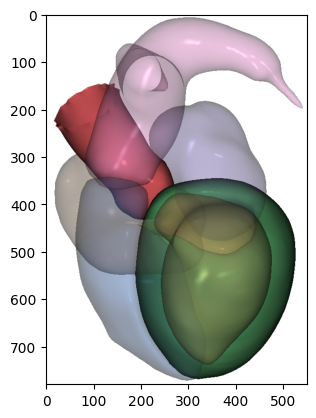

In [34]:
plt.imshow(heart[40:820,500:1050])

In [35]:
from render_volumes_paper import heart_color_dict, hp_color_dict, ms_color_dict

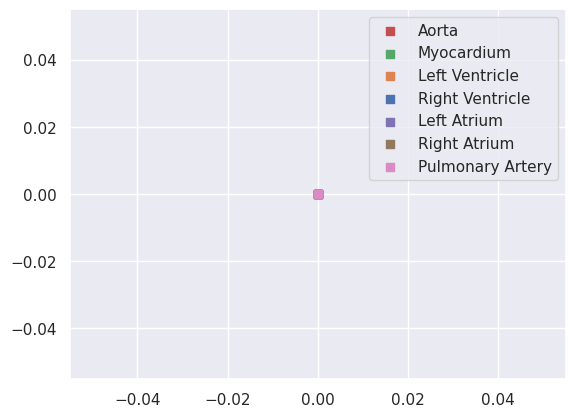

In [58]:
fig, ax = plt.subplots()
cp = sns.color_palette()
abbreviations_heart = {
    'Aorta': 'Aorta',
    'Myo': 'Myocardium',
    'LV': 'Left Ventricle',
    'RV': 'Right Ventricle',
    'LA': 'Left Atrium',
    'RA': 'Right Atrium',
    'PA': 'Pulmonary Artery'
}
for l, fl in abbreviations_heart.items():
# for l, c in heart_color_dict.items():
    c = heart_color_dict[l]
    if l == 'Aorta':
        c = cp[3]
    ax.scatter([0],[0],marker='s', color=c, label=fl)
ax.legend()
handles, labels = ax.get_legend_handles_labels()
fig_legend = plt.figure(figsize=(3,2))
axi = fig_legend.add_subplot(111)
axi.legend(handles, labels)
axi.axis('off')

# Save the legend to a file
fig_legend.savefig('notebooks/images/nature/legend_heart.png', bbox_inches='tight')
plt.close(fig_legend)

In [76]:
abbreviations_subtasks = {
    'RCC': 'Right Coronary Cusp',
    'LCC': 'Left Coronary Cusp',
    'NCC': 'Non-Coronary Cusp',
    'RCO': 'Right Coronary Ostia',
    'LCO': 'Left Coronary Ostia',
# }
# abbreviations_ms = {
    'UMS': 'Upper Membranous Septum',
    'LMS': 'Lower Membranous Septum'
}

TypeError: Patch.set_facecolor() takes 2 positional arguments but 3 were given

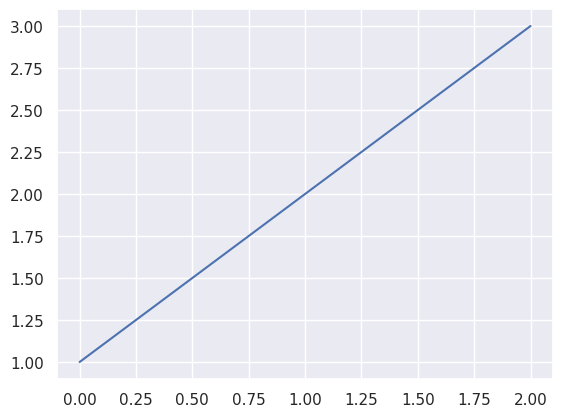

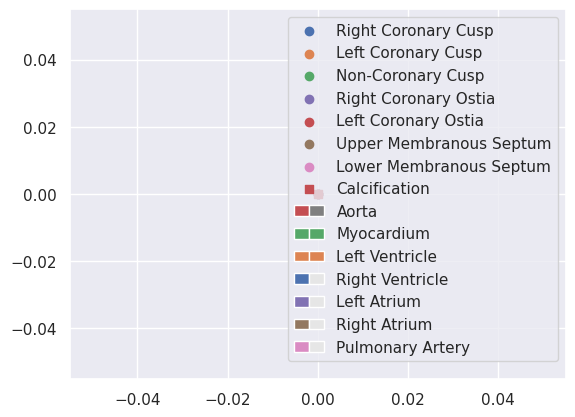

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

class TwoColorHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        # Create two patches for the two colors
        patch1 = mpatches.Rectangle([x0, y0], width/2, height, facecolor=orig_handle.color1, transform=trans)
        patch2 = mpatches.Rectangle([x0 + width/2, y0], width/2, height, facecolor=orig_handle.color2, transform=trans)
        return [patch1, patch2]

# Create a plot
fig, ax = plt.subplots()
ax.plot([1, 2, 3], label='Normal Line')

# Define custom patch with two colors
class TwoColorsPatch:
    def __init__(self, color1, color2):
        self.color1 = color1
        self.color2 = color2

fig, ax = plt.subplots()
for l, fl in abbreviations_subtasks.items():
    c = hp_color_dict.get(l, None)
    if c is None:
        c = ms_color_dict.get(l, None)
    if l == 'Aorta':
        c = cp[3]
    ax.scatter([0],[0],color=c, label=fl)
ax.scatter([0],[0],color=cp[3],marker='s',label='Calcification')

handles, labels = ax.get_legend_handles_labels()

# Add custom entry to the legend
two_color_patches = [
    TwoColorsPatch(cp[3], (0.5,0.5,0.5)),
    TwoColorsPatch(cp[2], cp[2]),
    TwoColorsPatch(cp[1], cp[1]),
    TwoColorsPatch(cp[0], (0.9,0.9,0.9)),
    TwoColorsPatch(cp[4], (0.9,0.9,0.9)),
    TwoColorsPatch(cp[5], (0.9,0.9,0.9)),
    TwoColorsPatch(cp[6], (0.9,0.9,0.9)),
]
ax.legend(handles + two_color_patches, labels + list(abbreviations_heart.values()), handler_map={TwoColorsPatch: TwoColorHandler()})

# handles, labels = ax.get_legend_handles_labels()
fig_legend = plt.figure(figsize=(3,2))
axi = fig_legend.add_subplot(111)
axi.legend(handles + two_color_patches, labels + list(abbreviations_heart.values()), handler_map={TwoColorsPatch: TwoColorHandler()})
axi.axis('off')

# Save the legend to a file
fig_legend.savefig('notebooks/images/nature/legend_all_subtasks1.png', bbox_inches='tight')
plt.close(fig_legend)

In [91]:
import numpy as np
[np.round(np.array(c)*255).astype('uint8').tolist() for c in cp]

[[76, 114, 176],
 [221, 132, 82],
 [85, 168, 104],
 [196, 78, 82],
 [129, 114, 179],
 [147, 120, 96],
 [218, 139, 195],
 [140, 140, 140],
 [204, 185, 116],
 [100, 181, 205]]

[ WARN:0@8640.181] global loadsave.cpp:248 findDecoder imread_('~/Downloads/beach.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

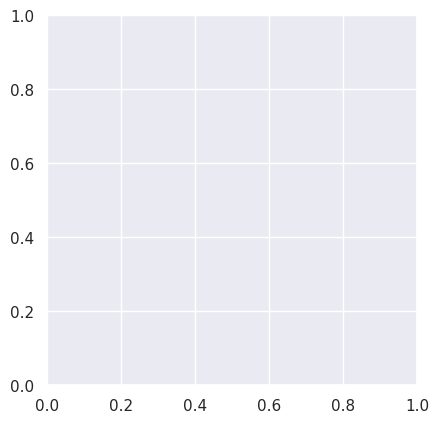

In [109]:
sami = cv2.imread('/mnt/hdd/downloads/sami-PhotoRoom(2).png')[200:-110, 100:-50]
cv2.imwrite('/mnt/hdd/downloads/sami2.png', sami)
beach = cv2.imread('~/Downloads/beach.jpg')
plt.imshow(beach)
plt.imshow(sami)